# Supervised Learning
### Benign and malignant cancer

                               id  diagnosis  radius_mean  texture_mean   
id                       1.000000   0.039769     0.074626      0.099770  \
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                

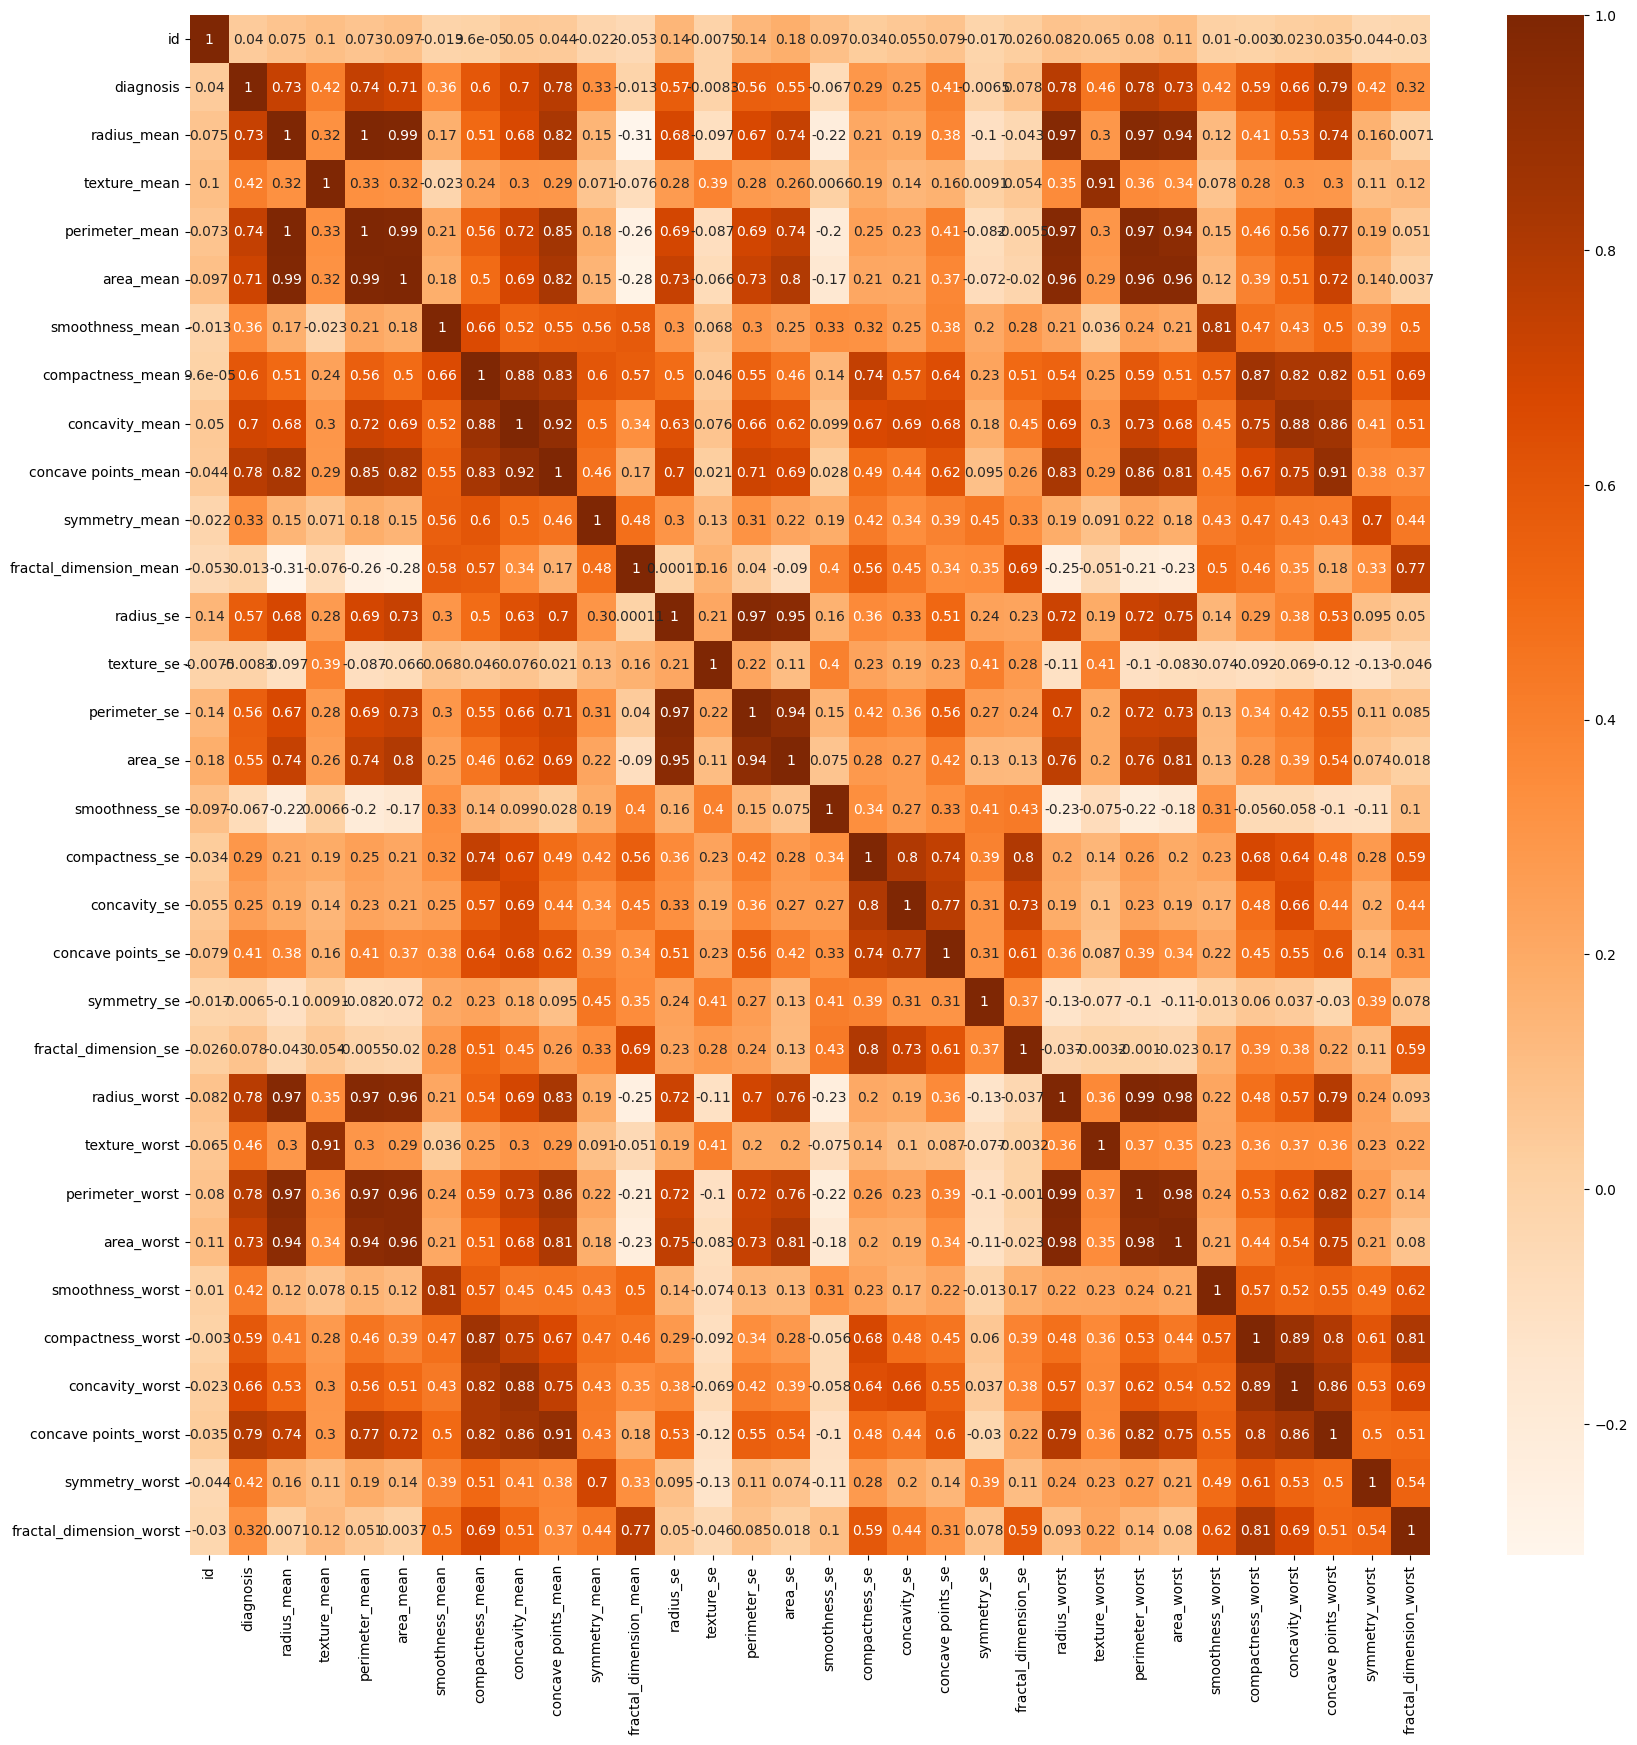

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from statistics import mean

dataset = pd.read_csv("../data/Cancer_Data.csv")

if 'Unnamed: 32' in dataset.columns:
    dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 

plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap='Oranges')
print(dataset.corr())
plt.show()

dataset

In [3]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['diagnosis','id'],axis=1)
y = dataset['diagnosis']



### Decision Tree

First, we will analyse the dataset with all information, and for that, we first need to create a decision tree.
Our first decision tree will be a default one, created by the scikit learn library.

In [4]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf = DecisionTreeClassifier() 


Now, we send the decision tree our train sample.

In [5]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

To make the predictions we call the function:

In [6]:

predictions = clf.predict(x_test)

dt_accuracy = accuracy_score(y_test, predictions)
dt_precision = precision_score(y_test, predictions)
dt_recall = recall_score(y_test, predictions)
dt_f1 = f1_score(y_test, predictions)

 (We also defined a function to plot the confusion matrix, which we will use later on). MUDAR ISTO PARA FAZER SENTIDO, TIVE QUE BAZAR E YA UELELEEEE

In [7]:
def show_plot(y_pred, accuracy, precision, recall, f1_score):

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap=plt.cm.Oranges)
    plt.title("Confusion Matrix\nAccuracy: {:.3f} - Precision: {:.3f} - Recall: {:.3f} - F1 Score: {:.3f}".format(accuracy, precision, recall, f1_score))
    plt.colorbar()
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.xticks([0, 1], ["Benign", "Malignant"])
    plt.yticks([0, 1], ["Benign", "Malignant"])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.show()

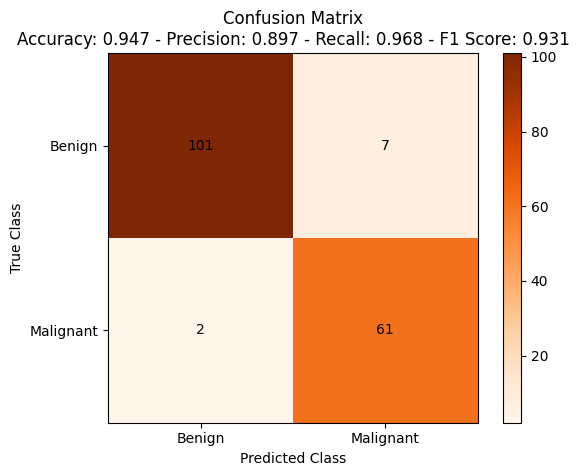

In [8]:
show_plot(predictions,dt_accuracy,dt_precision,dt_recall,dt_f1)

With this code, we can see the importance given to each feature of the dataset by the decision tree.

In [9]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
area_worst,0.704713
concave points_worst,0.133048
texture_mean,0.048411
texture_worst,0.026819
perimeter_se,0.020093
fractal_dimension_se,0.017683
concavity_mean,0.015325
symmetry_worst,0.010578
concave points_se,0.009506
compactness_worst,0.008046


In our dataset, we have 3 type of data:
 - worst: worst value recorded from that person
 - se: standard error
 - mean: mean a list of values

To see if we can improve our accuracy and precision, we are going to try to separate these 3 types and we will run it with the same decision tree to see if our results improve.<br>
We will also use the same lines as x_train and x_test so we can compare our results.

#### Dataset only with "Worst" values

In [10]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])


clf.fit(x_worst_train,y_train)
predictions_worst = clf.predict(x_worst_test)
dt_worst_accuracy = accuracy_score(y_test, predictions_worst)
dt_worst_precision = precision_score(y_test, predictions_worst)
dt_worst_recall = recall_score(y_test, predictions_worst)
dt_worst_f1 = f1_score(y_test, predictions_worst)

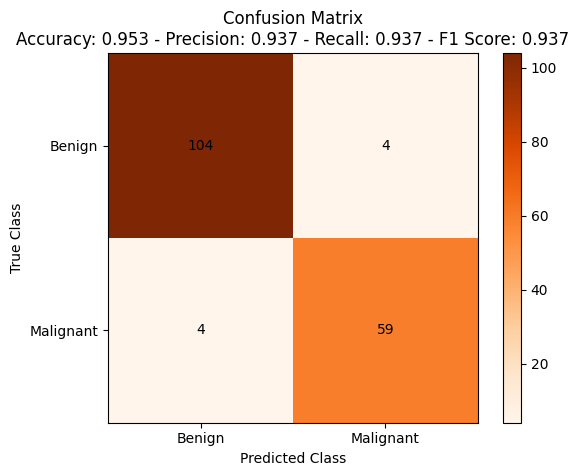

In [11]:
show_plot(predictions_worst,dt_worst_accuracy,dt_worst_precision,dt_worst_recall,dt_worst_f1)

In [12]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_worst_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
area_worst,0.717632
concave points_worst,0.133048
texture_worst,0.077788
fractal_dimension_worst,0.026438
perimeter_worst,0.023839
symmetry_worst,0.021255
concavity_worst,0.000000
compactness_worst,0.000000
smoothness_worst,0.000000
radius_worst,0.000000


#### Dataset only with "Mean" values

In [13]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])


clf.fit(x_mean_train,y_train)
predictions_mean = clf.predict(x_mean_test)
dt_mean_accuracy = accuracy_score(y_test, predictions_mean)
dt_mean_precision = precision_score(y_test, predictions_mean)
dt_mean_recall = recall_score(y_test, predictions_mean)
dt_mean_f1 = f1_score(y_test, predictions_mean)

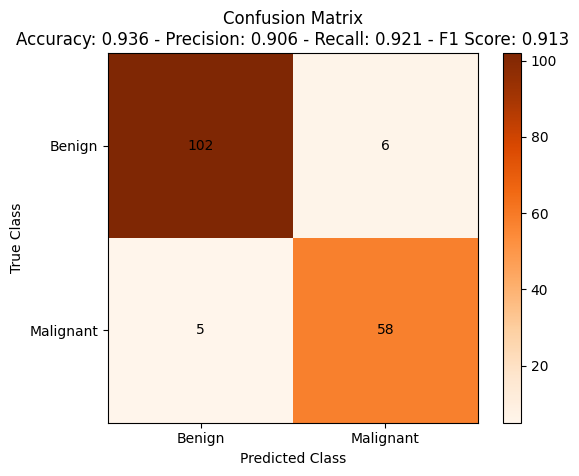

In [14]:
show_plot(predictions_mean,dt_mean_accuracy,dt_mean_precision,dt_mean_recall,dt_mean_f1)

In [15]:
feature_importance_mean = pd.DataFrame(clf.feature_importances_, index = x_mean_test.columns).sort_values(0, ascending=False)
feature_importance_mean.columns = ['%']
feature_importance_mean

,%
concave points_mean,0.698727
texture_mean,0.141691
area_mean,0.045578
perimeter_mean,0.039220
compactness_mean,0.019161
fractal_dimension_mean,0.016390
smoothness_mean,0.015990
concavity_mean,0.008940
symmetry_mean,0.007152
radius_mean,0.007152


#### Dataset only with "SE" values

In [16]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])


clf.fit(x_se_train,y_train)
predictions_se = clf.predict(x_se_test)
dt_se_accuracy = accuracy_score(y_test, predictions_se)
dt_se_precision = precision_score(y_test, predictions_se)
dt_se_recall = recall_score(y_test, predictions_se)
dt_se_f1 = f1_score(y_test, predictions_se)

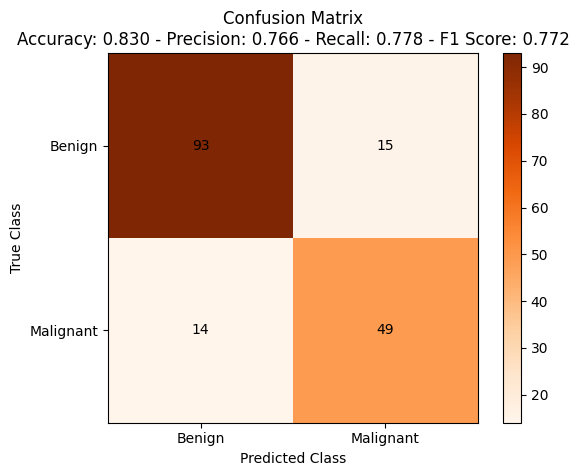

In [17]:
show_plot(predictions_se,dt_se_accuracy,dt_se_precision,dt_se_recall,dt_se_f1)

In [18]:
feature_importance_se = pd.DataFrame(clf.feature_importances_, index = x_se_test.columns).sort_values(0, ascending=False)
feature_importance_se.columns = ['%']
feature_importance_se

,%
area_se,0.592924
concave points_se,0.087321
symmetry_se,0.078746
concavity_se,0.058423
radius_se,0.048599
smoothness_se,0.035315
texture_se,0.030982
fractal_dimension_se,0.026699
compactness_se,0.021253
perimeter_se,0.019739


To examine which dataset gives the best results, we will run each dataset 100 times and compare its results

In [19]:
dt_accuracy_mean = []
dt_precision_mean = []
dt_recall_mean = []
dt_f1_mean = []

dt_worst_accuracy_mean = []
dt_worst_precision_mean = []
dt_worst_recall_mean = []
dt_worst_f1_mean = []

dt_mean_accuracy_mean = []
dt_mean_precision_mean = []
dt_mean_recall_mean = []
dt_mean_f1_mean = []

dt_se_accuracy_mean = []
dt_se_precision_mean = []
dt_se_recall_mean = []
dt_se_f1_mean = []

for i in range(100):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    clf = DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)

    dt_accuracy_mean.append(accuracy_score(y_test, predictions))
    dt_precision_mean.append(precision_score(y_test, predictions))
    dt_recall_mean.append(recall_score(y_test, predictions))
    dt_f1_mean.append(f1_score(y_test, predictions))


    x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
    x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

    clf.fit(x_worst_train,y_train)
    predictions_worst = clf.predict(x_worst_test)

    dt_worst_accuracy_mean.append(accuracy_score(y_test, predictions_worst))
    dt_worst_precision_mean.append(precision_score(y_test, predictions_worst))
    dt_worst_recall_mean.append(recall_score(y_test, predictions_worst))
    dt_worst_f1_mean.append(f1_score(y_test, predictions_worst))


    x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
    x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])

    clf.fit(x_mean_train,y_train)
    predictions_mean = clf.predict(x_mean_test)

    dt_mean_accuracy_mean.append(accuracy_score(y_test, predictions_mean))
    dt_mean_precision_mean.append(precision_score(y_test, predictions_mean))
    dt_mean_recall_mean.append(recall_score(y_test, predictions_mean))
    dt_mean_f1_mean.append(f1_score(y_test, predictions_mean))


    x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
    x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])

    clf.fit(x_se_train,y_train)
    predictions_se = clf.predict(x_se_test)

    dt_se_accuracy_mean.append(accuracy_score(y_test, predictions_se))
    dt_se_precision_mean.append(precision_score(y_test, predictions_se))
    dt_se_recall_mean.append(recall_score(y_test, predictions_se))
    dt_se_f1_mean.append(f1_score(y_test, predictions_se))

def show_mean_plot(type,normal,worst,mean_dt,se):
    plt.title("Normal: {:.4f} - Worst: {:.4f} - Mean: {:.4f} - SE: {:.4f}".format(mean(normal), mean(worst), mean(mean_dt), mean(se)))
    plt.plot(normal, label = 'Normal ' + type)
    plt.plot(worst, label = 'Worst ' + type)
    plt.plot(mean_dt, label = 'Mean ' + type)
    plt.plot(se, label = 'SE ' + type)
    plt.legend(loc = 'lower right')



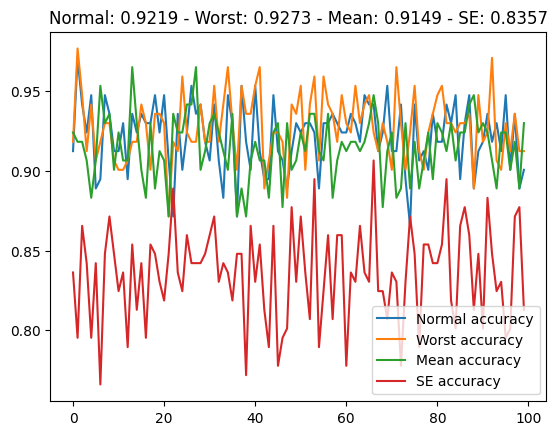

In [20]:
show_mean_plot("accuracy",dt_accuracy_mean,dt_worst_accuracy_mean,dt_mean_accuracy_mean,dt_se_accuracy_mean)

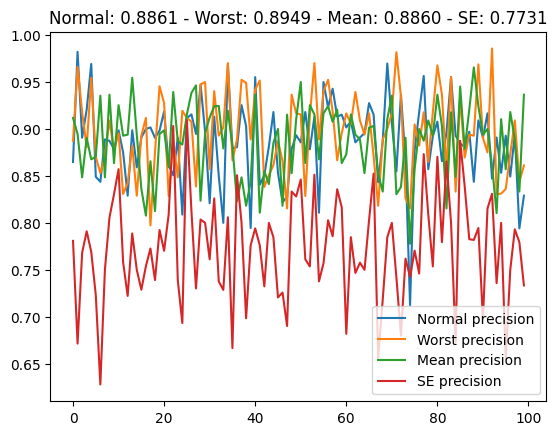

In [21]:
show_mean_plot("precision",dt_precision_mean,dt_worst_precision_mean,dt_mean_precision_mean,dt_se_precision_mean)

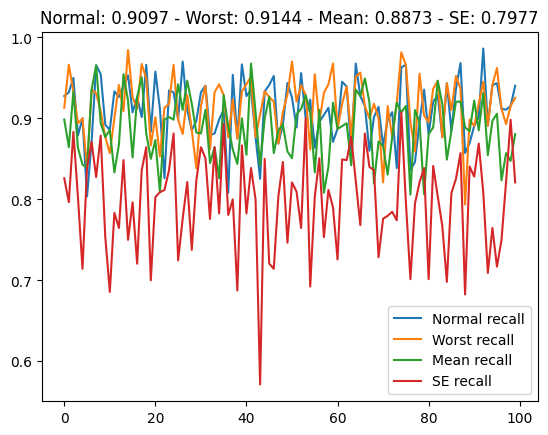

In [22]:
show_mean_plot("recall",dt_recall_mean,dt_worst_recall_mean,dt_mean_recall_mean,dt_se_recall_mean)

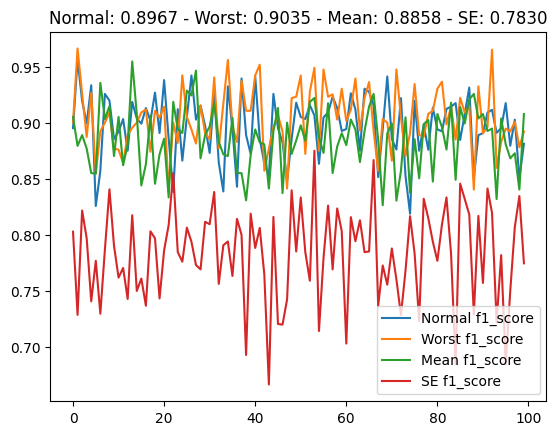

In [23]:
show_mean_plot("f1_score",dt_f1_mean,dt_worst_f1_mean,dt_mean_f1_mean,dt_se_f1_mean)

As we can see, in general, the worst dataset produces the best results

The fact that the values are all very close might be explained by the fact that the Decision tree algorithm uses the greedy algorithm at each split finding a local optima, since "worst" values give the best results, all the datasets containing that values are going to be very similar. <br>
A way to improve decision trees is to avoid overfitting. This could be made by limiting maximum depth, pruning etc.
When we prune a tree we are correcting it after it has been fitted to the training dataset. It starts at the leaf nodes and removes those branches that do not affect the overall tree accuracy. It also lowers the complexity of the model.
<br>
In our code we can use sklearn to prune our trees using the ``ccp_alpha`` attribute inside the ``DecisionTreeClassifier`` function.


#### Dataset with "worst" values using pruning

To prune a tree using sklearn we have to set the attribute `ccp_alpha` inside the `DecisionTreeClassifier` function but this value varies with each tree.<br>
A way to calculate the best alpha value for each tree is to get the different applicable alpha values. Then we just run the same decision tree with the different alpha values to get the accuracy.<br>
The code below shows the relation between alpha and accuracy.

Text(0, 0.5, 'Accuracy scores')

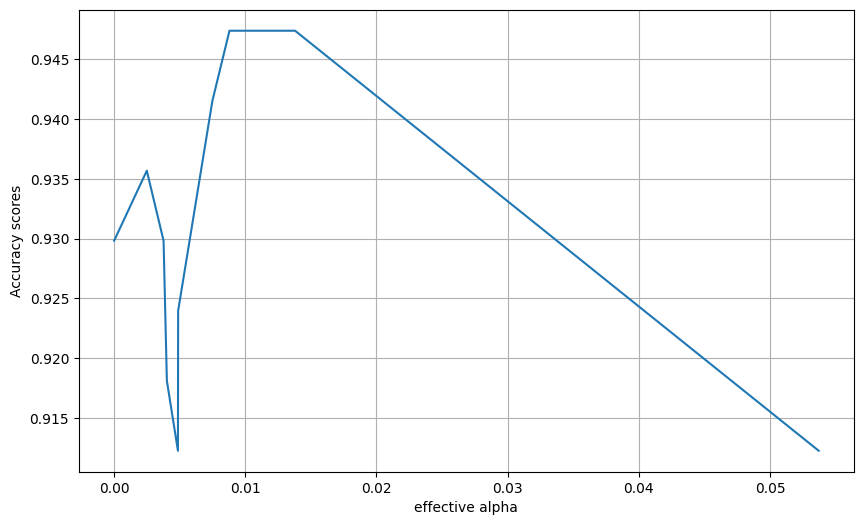

In [24]:
path = clf.cost_complexity_pruning_path(x_worst_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf_worst = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_worst.fit(x_worst_train, y_train)
    clfs.append(clf_worst)

acc_scores = [accuracy_score(y_test, clf_worst.predict(x_worst_test)) for clf_worst in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [25]:
recall_values = []

for i in range(100):
    x_alpha = x.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

    x_alpha_train, x_alpha_test, y_alpha_train, y_alpha_test = train_test_split(x_alpha, y, test_size=0.3)
    x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
    x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

    
    clf_alpha = DecisionTreeClassifier() 

    path = clf_alpha.cost_complexity_pruning_path(x_alpha_train, y_alpha_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    clfs = []

    for ccp_alpha in ccp_alphas:
        clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf_alpha.fit(x_alpha_train, y_alpha_train)
        clfs.append(clf_alpha)

    acc_scores = [recall_score(y_alpha_test, clf_alpha.predict(x_alpha_test)) for clf_alpha in clfs]
    recall_values.append(max(acc_scores))

mean(recall_values)

    


0.9318692969241112

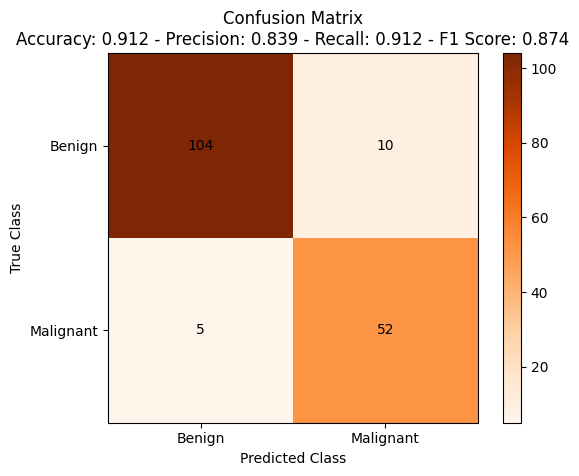

In [26]:
from sklearn.model_selection import GridSearchCV, KFold

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf = DecisionTreeClassifier() 
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])


param_grid = {
    "criterion": ['gini','entropy'],
    "max_depth": [4,5,6,7,8],
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,5),
    "ccp_alpha": [0,0.005,0.01,0.015,0.02,0.025,0.03],
    "max_features": ['sqrt','log2']
}
clf = DecisionTreeClassifier() 
cv = KFold(n_splits=10)

grid_search = GridSearchCV(clf, param_grid, scoring='recall', cv=cv) # Perform grid search with cross-validation
grid_search.fit(x_worst_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_prediction = best_model.predict(x_worst_test)

best_dt_acc = accuracy_score(y_test, best_prediction)
best_dt_pre = precision_score(y_test, best_prediction)
best_dt_rec = recall_score(y_test, best_prediction)
best_dt_f1 = f1_score(y_test, best_prediction)

show_plot(best_prediction, best_dt_acc, best_dt_pre, best_dt_rec, best_dt_f1)

In [27]:
best_model.get_params()

{'ccp_alpha': 0.03,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

A good thing about decision tree, is that we can visualize the path followed by the algorithm to predict it's values. The next code, prints us the tree of the best model.

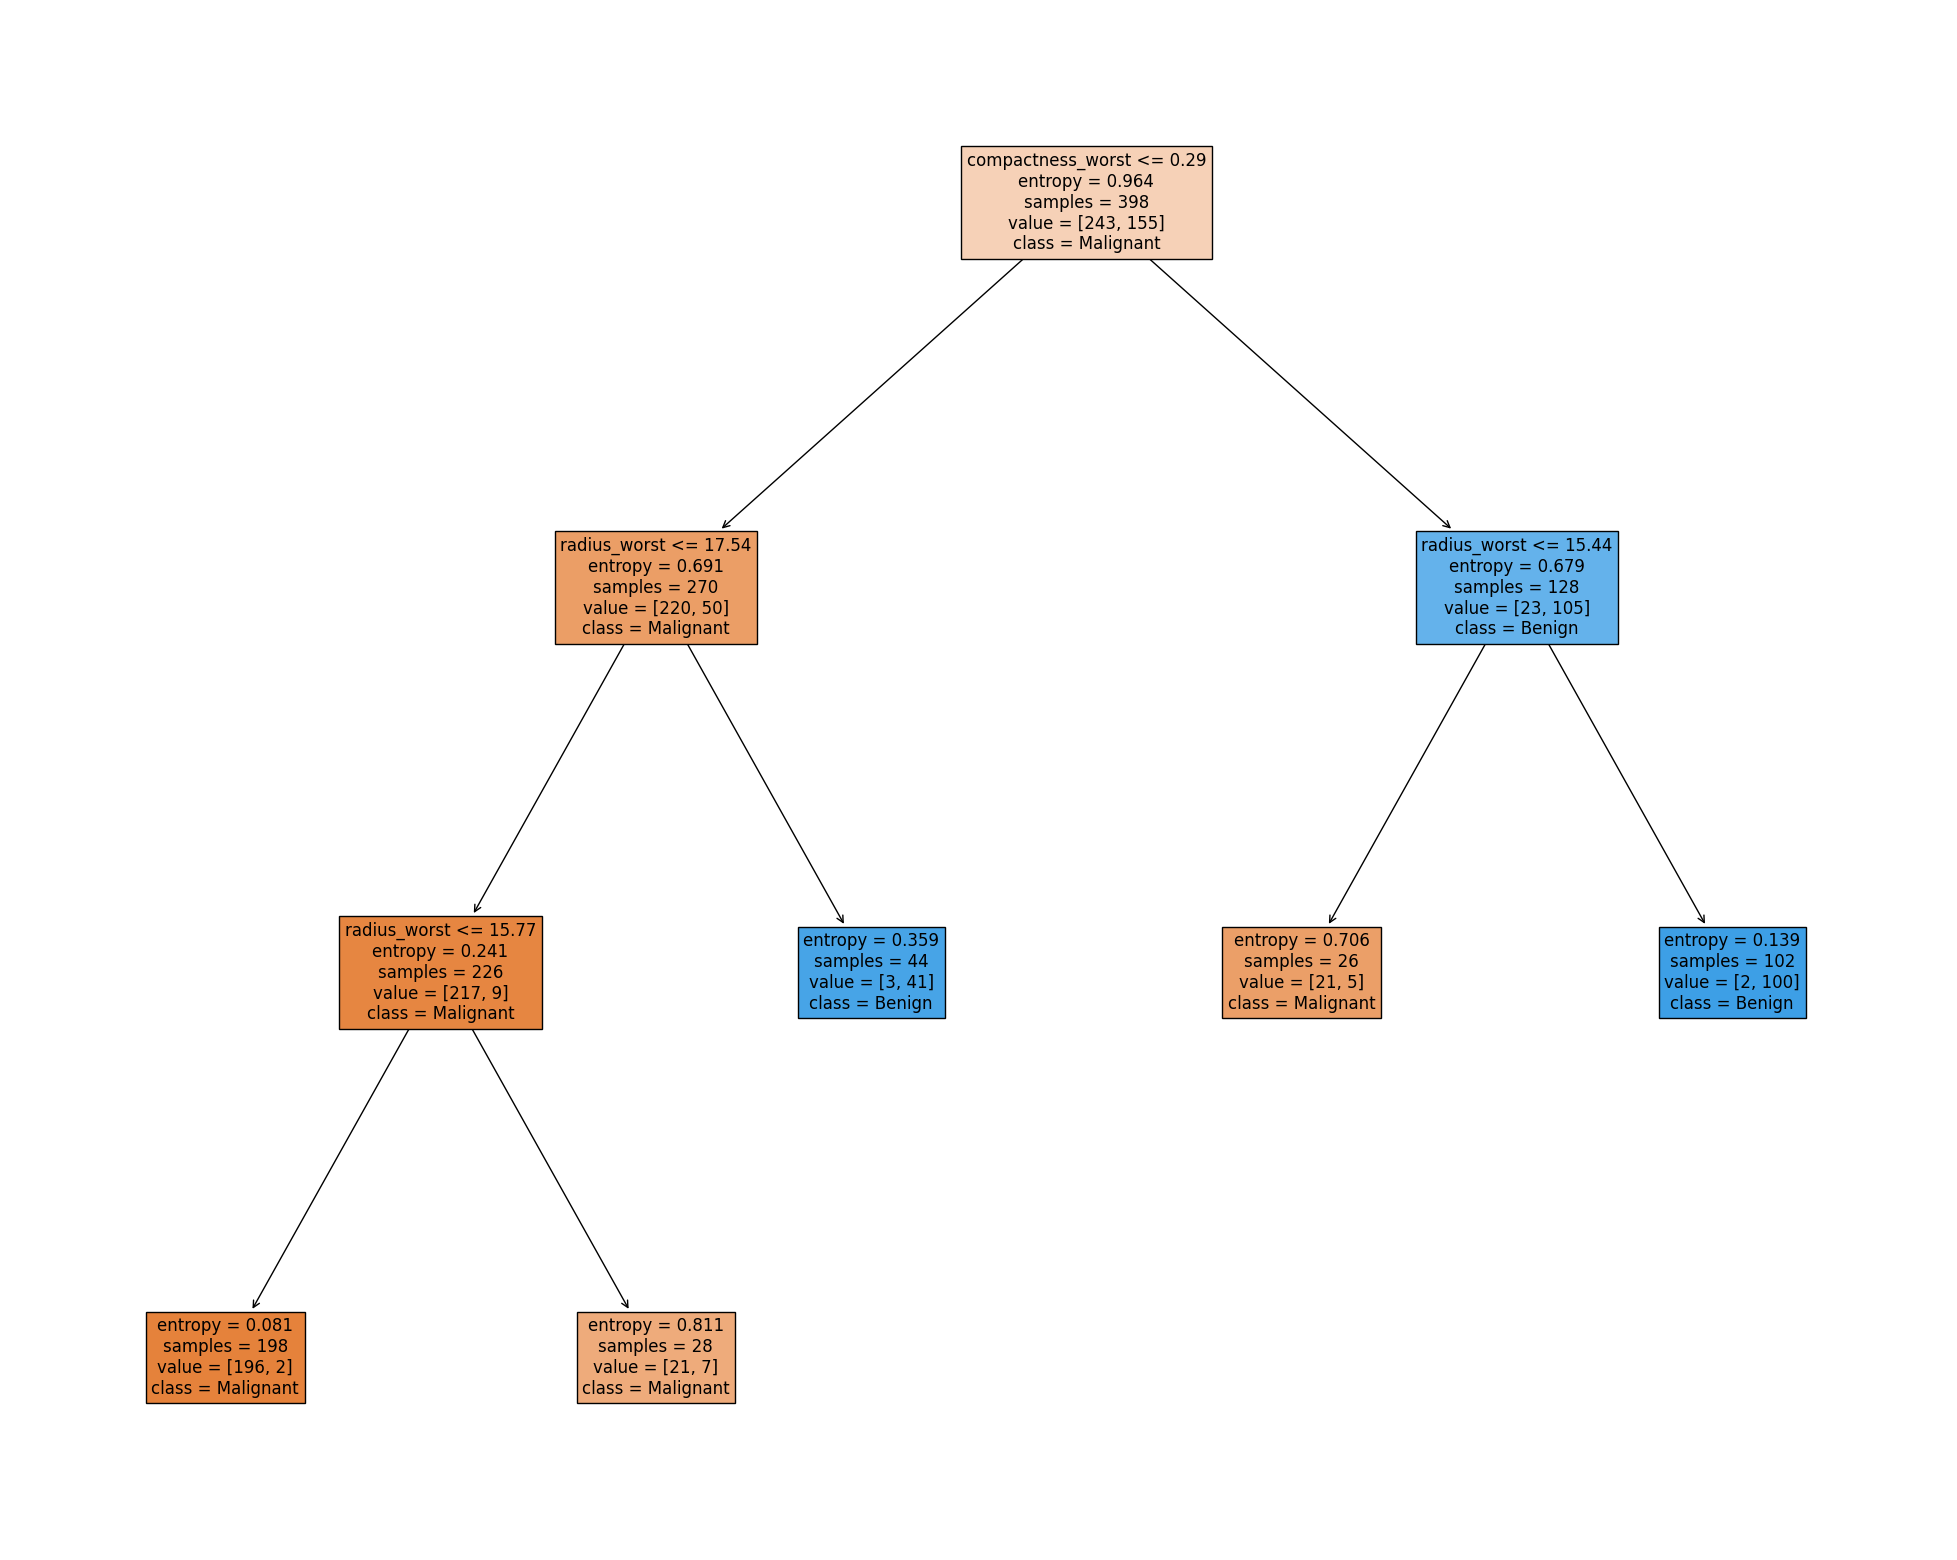

In [28]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model, 
                   feature_names=x_worst_train.columns,  
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

### KNN
First let's set up the KNN algoritm with its default configuration

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from matplotlib import pyplot as plt


def run_knn_predictions(p1, p2):
    accuracy_score_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = [] 
    for i in range(0, 100):  
        dataset = pd.read_csv("../data/Cancer_Data.csv")

        if 'Unnamed: 32' in dataset.columns:
            dataset.drop('Unnamed: 32', axis=1, inplace=True)
        dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 

        x = dataset.iloc[:, p1:p2]
        y = dataset['diagnosis']

        x_train2, x_test2, y_train, y_test = train_test_split(x, y, test_size=0.3)

        sc_x = StandardScaler()
        x_train2 = sc_x.fit_transform(x_train2)
        x_test2 = sc_x.transform(x_test2)

        #default k = 5
        #default metric = minkowski
        #default weights = uniform
        #defualt algorithm = auto
        classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform', algorithm='auto')

        classifier.fit(x_train2, y_train)

        y_pred = classifier.predict(x_test2)

        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        precision_score_list.append(precision_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred))
        f1_score_list.append(f1_score(y_test, y_pred))

    acc = round((sum(accuracy_score_list) / len(accuracy_score_list)), 3)
    pre = round((sum(precision_score_list) / len(precision_score_list)), 3)
    rec = round((sum(recall_score_list) / len(recall_score_list)), 3)
    f1 = round((sum(f1_score_list) / len(f1_score_list)), 3)

    show_plot(y_pred, acc, pre, rec, f1)

#### Dataset with all values using KNN in default configuration

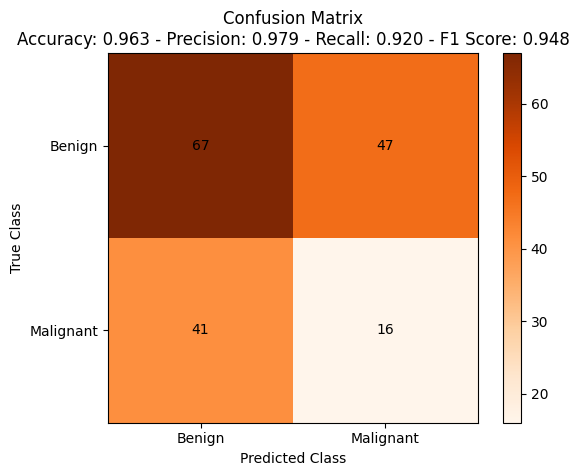

In [30]:
run_knn_predictions(2, 32)

#### Dataset with mean values using KNN in default configuration

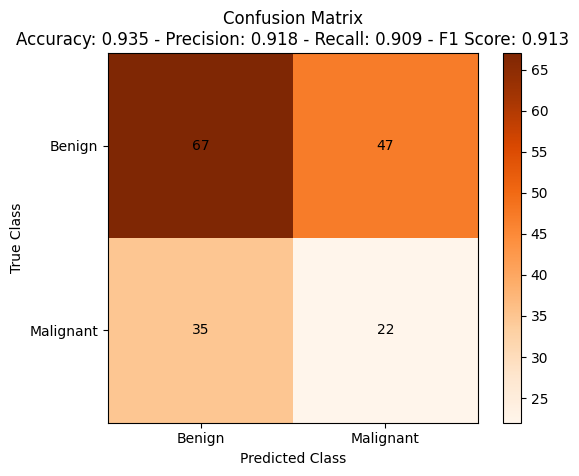

In [31]:
run_knn_predictions(2, 12)

#### Dataset with SE values using KNN in default configuration

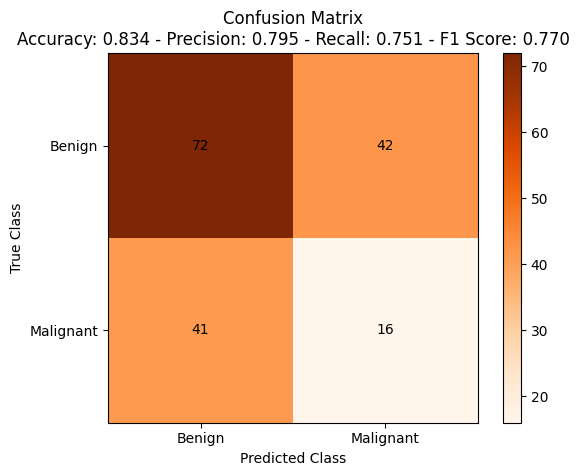

In [32]:
run_knn_predictions(12, 22)

#### Dataset with worst values using KNN in default configuration

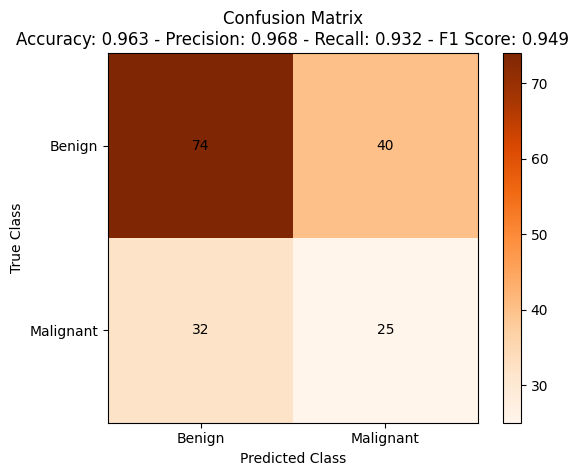

In [33]:
run_knn_predictions(22, 32)

We conclude the ideal attributes to base our research on are the worst attributes, since they give us the highest average recall score, using KNN with the default hyperparameters.

#### What are the best hyperparameters to use in KNN?
- k number of neighbours: small odd number
- m metric: minkowski, euclidean or manhattan
- w weights: uniform or distance
- a algorithm: auto, ball tree, kd tree or brute

In [34]:
recall_score_list = []
print("Avg Recall Score:")
for k in [1, 3, 5, 7, 9, 11, 13]:
    for m in ['minkowski','euclidean','manhattan']:
        for w in ['uniform','distance']:
            for a in ['auto', 'ball_tree', 'kd_tree', 'brute']:
                for i in range(1, 50):  
                    dataset = pd.read_csv("../data/Cancer_Data.csv")

                    if 'Unnamed: 32' in dataset.columns:
                        dataset.drop('Unnamed: 32', axis=1, inplace=True)
                    dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 

                    x = dataset.iloc[:, 22:32]
                    y = dataset['diagnosis']

                    x_train2, x_test2, y_train, y_test = train_test_split(x, y, test_size=0.3)

                    sc_x = StandardScaler()
                    x_train2 = sc_x.fit_transform(x_train2)
                    x_test2 = sc_x.transform(x_test2)

                    classifier = KNeighborsClassifier(n_neighbors=k, metric=m, weights=w, algorithm=a)

                    classifier.fit(x_train2, y_train)

                    y_pred = classifier.predict(x_test2)

                    recall_score_list.append(recall_score(y_test, y_pred))
                    
                print("k =",k,"| m =", m,"| w =",w,"| a =",a, ":", round(100 * (sum(recall_score_list) / len(recall_score_list)), 2), "%")


Avg Recall Score:
k = 1 | m = minkowski | w = uniform | a = auto : 94.06 %
k = 1 | m = minkowski | w = uniform | a = ball_tree : 93.99 %
k = 1 | m = minkowski | w = uniform | a = kd_tree : 93.92 %
k = 1 | m = minkowski | w = uniform | a = brute : 93.88 %
k = 1 | m = minkowski | w = distance | a = auto : 93.82 %
k = 1 | m = minkowski | w = distance | a = ball_tree : 93.84 %
k = 1 | m = minkowski | w = distance | a = kd_tree : 93.81 %
k = 1 | m = minkowski | w = distance | a = brute : 93.72 %
k = 1 | m = euclidean | w = uniform | a = auto : 93.73 %
k = 1 | m = euclidean | w = uniform | a = ball_tree : 93.66 %
k = 1 | m = euclidean | w = uniform | a = kd_tree : 93.61 %
k = 1 | m = euclidean | w = uniform | a = brute : 93.64 %
k = 1 | m = euclidean | w = distance | a = auto : 93.65 %
k = 1 | m = euclidean | w = distance | a = ball_tree : 93.67 %
k = 1 | m = euclidean | w = distance | a = kd_tree : 93.75 %
k = 1 | m = euclidean | w = distance | a = brute : 93.74 %
k = 1 | m = manhattan | w 

As we can see, even with so many changes, the average recall score can entirely vary in a margin of less than 1%.

#### Best configuration for KNN
Using the configuration that got us the best result in average recall score (k = 1 | m = euclidean | w = distance | a = brute), we can analyse its other scores.

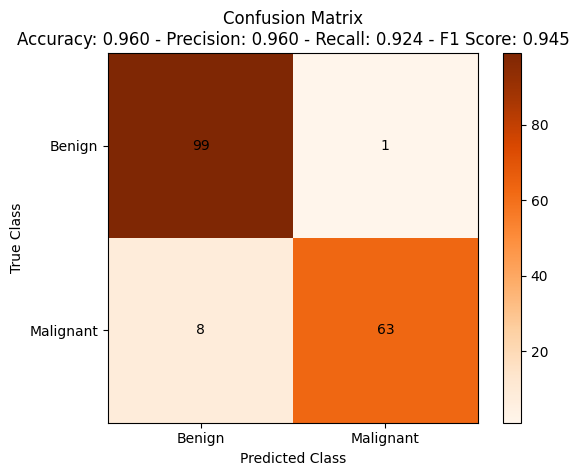

In [35]:
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = [] 
for i in range(0, 50):  
    dataset = pd.read_csv("../data/Cancer_Data.csv")
    if 'Unnamed: 32' in dataset.columns:
        dataset.drop('Unnamed: 32', axis=1, inplace=True)
    dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 
    x = dataset.iloc[:, 22:32]
    y = dataset['diagnosis']
    x_train2, x_test2, y_train, y_test = train_test_split(x, y, test_size=0.3)
    sc_x = StandardScaler()
    x_train2 = sc_x.fit_transform(x_train2)
    x_test2 = sc_x.transform(x_test2)
    classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance', algorithm='brute')
    classifier.fit(x_train2, y_train)
    y_pred = classifier.predict(x_test2)
    accuracy_score_list.append(accuracy_score(y_test, y_pred))
    precision_score_list.append(precision_score(y_test, y_pred))
    recall_score_list.append(recall_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
best_knn_acc = round((sum(accuracy_score_list) / len(accuracy_score_list)), 3)
best_knn_pre = round((sum(precision_score_list) / len(precision_score_list)), 3)
best_knn_rec = round((sum(recall_score_list) / len(recall_score_list)), 3)
best_knn_f1 = round((sum(f1_score_list) / len(f1_score_list)), 3)
show_plot(y_pred, best_knn_acc , best_knn_acc , best_knn_rec, best_knn_f1)

### Support Vector Machine

Suppot vector machines (SVM) attempt to find a hyperplane in an space of N dimensions, where N is the number of classification attributes. <br>This hyperplane is used to separate the data into two distinct classes, in our case, benign and malignant cancer.

We will use the same datasets as before, and start by an SVM classifier object and fit it to our training data. We then make a prediction using the test data and calculate the accuracy and precision, as well as the confusion matrix.

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score

svm = SVC()
svm.fit(x_train, y_train)

svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [37]:
y_pred = svm.predict(x_test)


svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


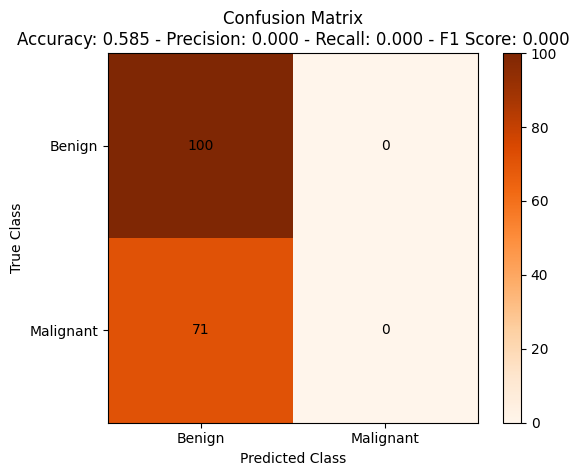

In [38]:
show_plot(y_pred, svm_accuracy, svm_precision, svm_recall, svm_f1)

As we can see in the confusion matrix, the SVM classifier shows promising results. However, we can try to improve it by removing attributes that could muddle the model. This would also reduce the number of dimensions we have to deal with, which simplifies the model.
<br> We'll do this by dividing the features into three groups: worst, mean and standard error. We'll then run the SVM classifier on each group and compare the results.

#### Dataset with only "Worst" features

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


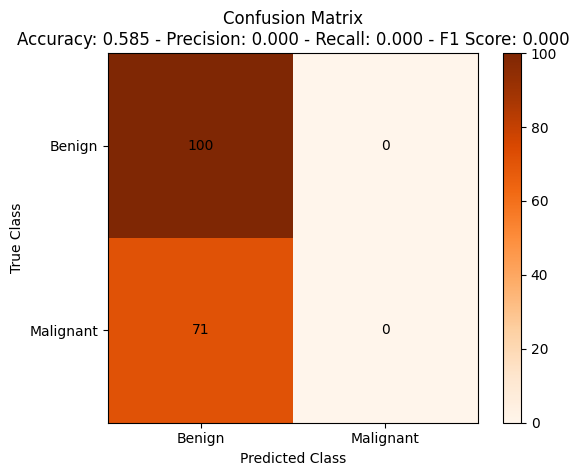

In [39]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

svm.fit(x_worst_train,y_train)
svm_predictions_worst = svm.predict(x_worst_test)

svm_accuracy_worst = accuracy_score(y_test, svm_predictions_worst)
svm_precision_worst = precision_score(y_test, svm_predictions_worst)
svm_recall_worst = recall_score(y_test, svm_predictions_worst)
svm_f1_worst = f1_score(y_test, svm_predictions_worst)

show_plot(svm_predictions_worst, svm_accuracy_worst, svm_precision_worst, svm_recall_worst, svm_f1_worst)

#### Dataset with only "Mean" features

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


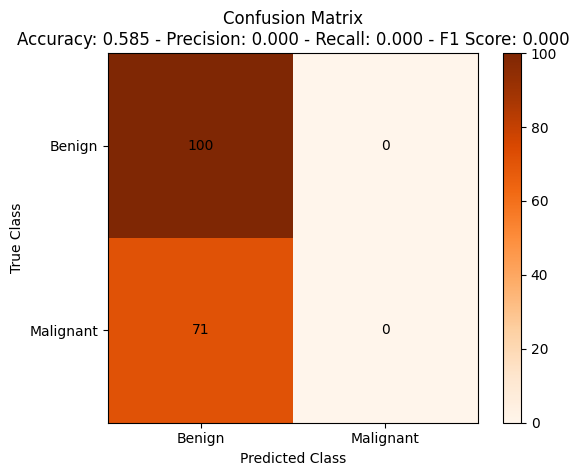

In [40]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])



svm.fit(x_mean_train,y_train)
svm_predictions_mean = svm.predict(x_mean_test)

svm_accuracy_mean = accuracy_score(y_test, svm_predictions_mean)
svm_precision_mean = precision_score(y_test, svm_predictions_mean)
svm_recall_mean = recall_score(y_test, svm_predictions_mean)
svm_f1_mean = f1_score(y_test, svm_predictions_mean)

show_plot(svm_predictions_mean, svm_accuracy_mean, svm_precision_mean, svm_recall_mean, svm_f1_mean)

#### Dataset with only "Standard Error" features

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


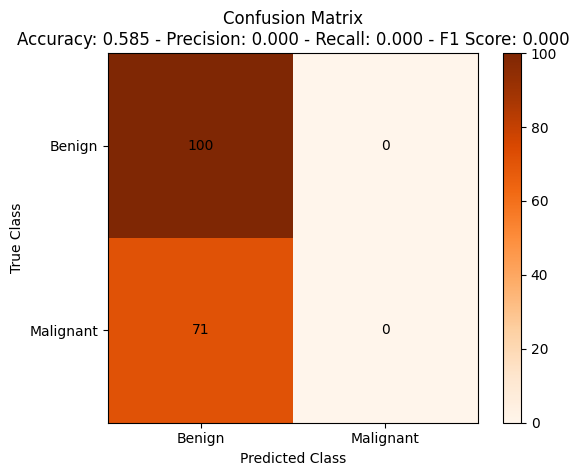

In [41]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])



svm.fit(x_se_train,y_train)
svm_predictions_se = svm.predict(x_se_test)

svm_accuracy_se = accuracy_score(y_test, svm_predictions_se)
svm_precision_se = precision_score(y_test, svm_predictions_se)
svm_recall_se = recall_score(y_test, svm_predictions_se)
svm_f1_se = f1_score(y_test, svm_predictions_se)

show_plot(svm_predictions_se, svm_accuracy_se, svm_precision_se, svm_recall_se, svm_f1_se)

From the previous tests we can conclude that, just like with the decision tree, the dataset with the worst features has the best results.
<br> We can also see that SVM gets better values all around compared to the decision tree, which is expected since SVM can handle outliers better than the decision tree by allowing some misclassification. 

We are getting good results but we can still try to improve our model. From now on we'll only use the dataset with the "Worst" features, and we'll try to improve the model by tuning the hyperparameters. We'll use the GridSearchCV function from sklearn to find the best hyperparameters for our model.

In [45]:
from sklearn.model_selection import GridSearchCV, KFold


parameter_grid = {'C': [10, 100, 1000],
                  'kernel': ['poly', 'rbf'],
                  'gamma': [1, 0.1,0.01],
                  'coef0': [0.0, 0.1, 0.2],
                  }

cv = KFold(n_splits=10)

grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=cv) # Perform grid search with cross-validation
grid_search.fit(x_worst_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_prediction = best_model.predict(x_worst_test)

best_svm_acc = accuracy_score(y_test, best_prediction)
best_svm_pre = precision_score(y_test, best_prediction)
best_svm_rec = recall_score(y_test, best_prediction)
best_svm_f1 = f1_score(y_test, best_prediction)

show_plot(best_prediction, best_svm_acc, best_svm_pre, best_svm_rec, best_svm_f1)

ValueError: Invalid parameter 'ccp_alpha' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].

### Comparing the algorithms

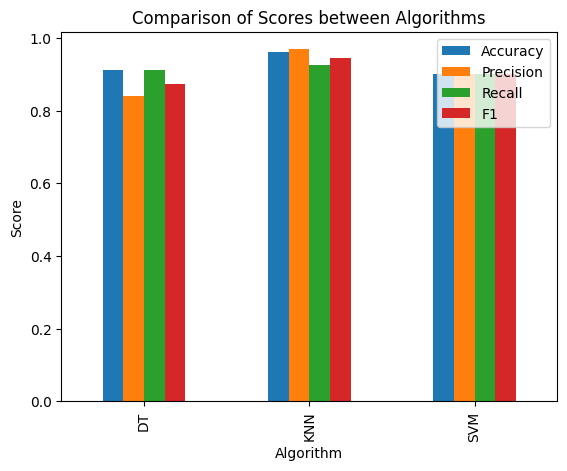

In [50]:
dataFinalComparison = {
    'Score': ['DT', 'KNN', 'SVM'],
    'Accuracy': [best_dt_acc, best_knn_acc, 0.9],
    'Precision': [best_dt_pre, best_knn_pre, 0.9],
    'Recall': [best_dt_rec, best_knn_rec, 0.9],
    'F1': [best_dt_f1, best_knn_f1, 0.9]
}

df = pd.DataFrame(dataFinalComparison)

df.plot(x='Score', y=['Accuracy', 'Precision', 'Recall', 'F1'], kind='bar')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Comparison of Scores between Algorithms')
plt.show()